In [1]:
% tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import datasets, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

TensorFlow 2.x selected.


In [0]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()  

In [0]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
train_labels, train_labels.shape

(array([[6],
        [9],
        [9],
        ...,
        [9],
        [1],
        [1]], dtype=uint8), (50000, 1))

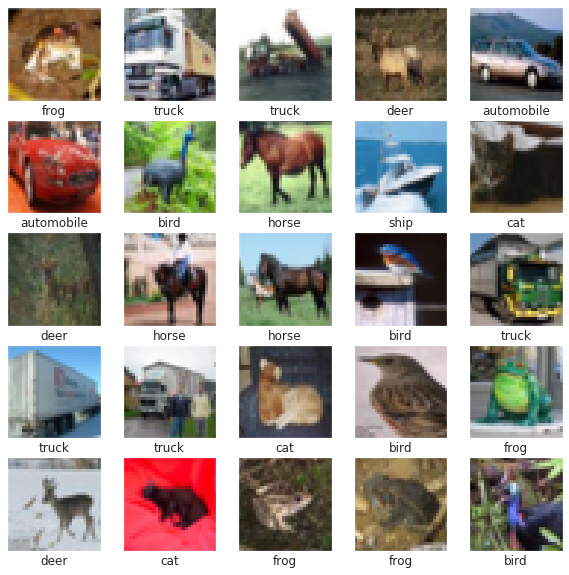

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [0]:
model = models.Sequential([ Conv2D(32, (3,3), activation='relu', input_shape = (32,32,3)),
                            MaxPooling2D((2,2)),
                            Conv2D(64, (3,3), activation='relu'),
                            MaxPooling2D((2,2)),
                            Conv2D(64, (3,3), activation='relu'),
                            Flatten(),
                            Dense(64, activation='relu'),
                            Dense(10, activation='softmax') ])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [0]:
my_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [9]:
model.compile(optimizer= my_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 14s 287us/sample - loss: 1.5525 - accuracy: 0.4331 - val_loss: 1.3217 - val_accuracy: 0.5234
Epoch 2/10
50000/50000 [==============================] - 12s 246us/sample - loss: 1.1926 - accuracy: 0.5763 - val_loss: 1.0936 - val_accuracy: 0.6115
Epoch 3/10
50000/50000 [==============================] - 12s 248us/sample - loss: 1.0274 - accuracy: 0.6360 - val_loss: 1.0030 - val_accuracy: 0.6542
Epoch 4/10
50000/50000 [==============================] - 13s 253us/sample - loss: 0.9255 - accuracy: 0.6756 - val_loss: 0.9337 - val_accuracy: 0.6705
Epoch 5/10
50000/50000 [==============================] - 13s 254us/sample - loss: 0.8482 - accuracy: 0.7040 - val_loss: 0.9163 - val_accuracy: 0.6852
Epoch 6/10
50000/50000 [==============================] - 13s 252us/sample - loss: 0.7879 - accuracy: 0.7227 - val_loss: 0.8981 - val_accuracy: 0.6931
Epoch 7/10
50000/50000 [====================

10000/1 - 1s - loss: 0.7817 - accuracy: 0.7102


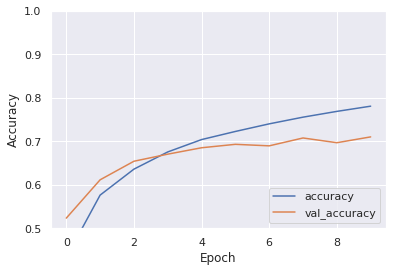

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [11]:
print(test_acc)

0.7102
